# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [8]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [5]:
plt.rcParams['figure.figsize'] = (12, 4)

%matplotlib inline

C:\Users\Koh\AppData\Local\Temp\ipykernel_12756\709011220.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fitbit.groupby('Months_encoded').median().Steps.plot(kind='bar')


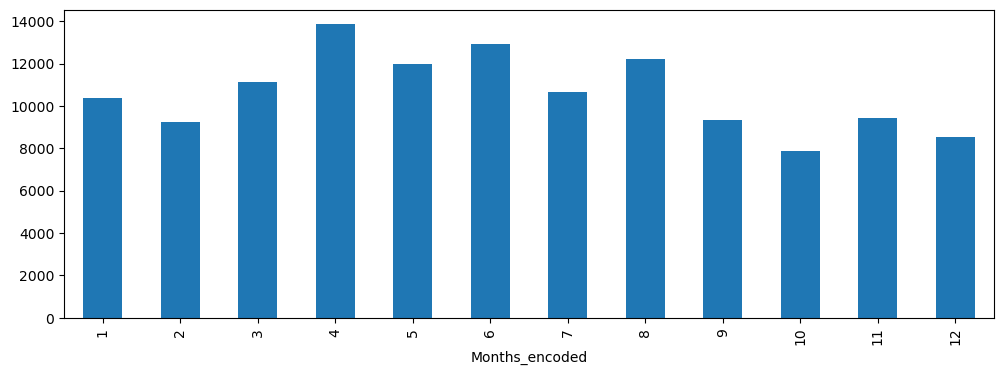

In [36]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit.groupby('Months_encoded').median().Steps.plot(kind='bar')

plt.savefig('../figures/avg_stps_month.png');

C:\Users\Koh\AppData\Local\Temp\ipykernel_12756\2393881375.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fitbit.groupby('Work_or_Weekend').median().Steps.plot(kind='bar')


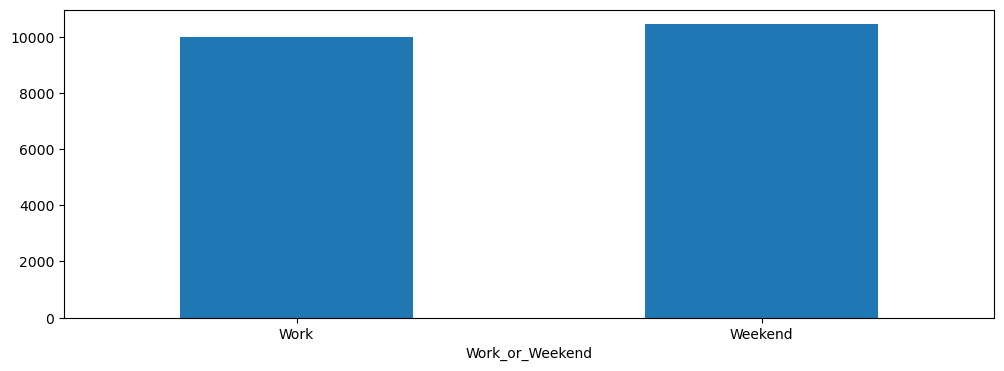

In [52]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit.groupby('Work_or_Weekend').median().Steps.plot(kind='bar')

plt.xticks(ticks=[0, 1], labels=['Work', 'Weekend'], rotation=0)

plt.savefig('../figures/avg_stps_work_or_weekend.png');

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

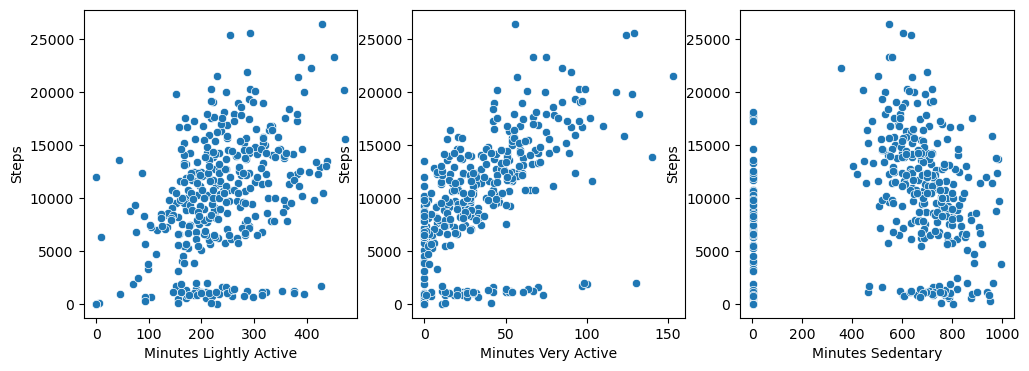

In [60]:
fig, ax = plt.subplots(1, 3)

categories = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i, cat in enumerate(categories):
    sns.scatterplot(ax = ax[i],
                    data = fitbit,
                    x = cat,
                    y = 'Steps')
    
plt.savefig('../figures/three_scatters.png');

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [59]:
titanic = pd.read_csv('../data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [62]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [74]:
# NUMERICAL VARIABLES
titanic.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1309.0,29.879186,13.448335,0.17,22.0000,28.5000,37.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292


In [67]:
# CATEGORICAL VARIABLES
titanic.describe(include='object').T

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Gender,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,1309,187,U0,1014
Embarked,1309,3,S,916


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [77]:
sns.set_style('dark') # no hay classic así que he puesto dark que me mola
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

In [83]:
titanic.Age.max() - titanic.Age.min()

79.83

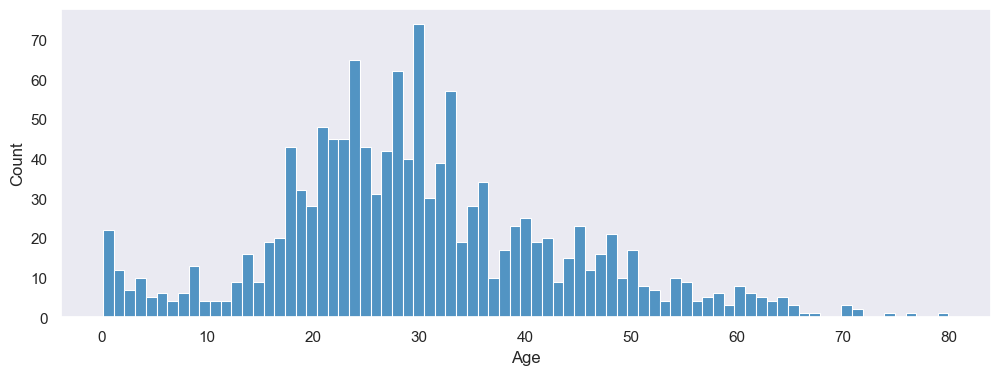

In [85]:
sns.histplot(x=titanic.Age,
            bins = 79
            )

plt.savefig('../figures/age_hist.png');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

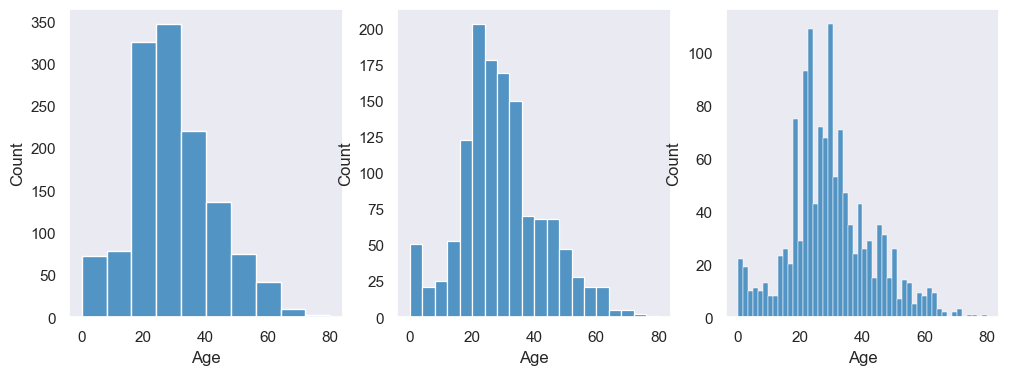

In [90]:
fig, ax = plt.subplots(1, 3)

bins = [10, 20, 50]

for i, bins in enumerate(bins):
    sns.histplot(ax = ax[i],
                x=titanic.Age,
                bins = bins
                )
    
plt.savefig('../figures/three_plots.png');

#### How does the bin size affect your plot?

In [91]:
"""
The more bins, the more complex anddifficult is to discern differences,
but there's less bias if there are a lot of people of an specific age
and too litle of people one year younger or older. 
"""

"\nThe more bins, the more complex anddifficult is to discern differences,\nbut there's less bias if there are a lot of people of an specific age\nand too litle of people one year younger or older. \n"

#### Use seaborn to show the distribution of column `Age`.

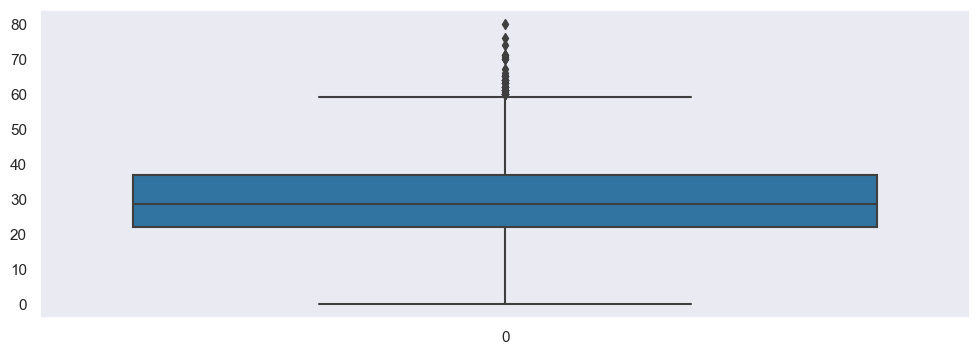

In [93]:
sns.boxplot(data = titanic.Age)

plt.savefig('../figures/age_dist.png');

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

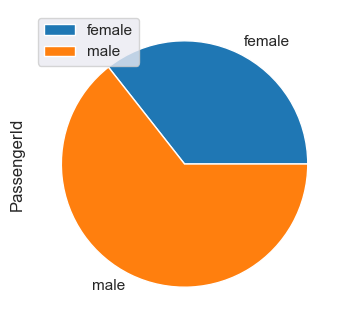

In [122]:
# Method 1 - matplotlib
titanic.groupby('Gender').count().plot(kind='pie', y='PassengerId')

plt.savefig('../figures/gender_matplot.png');

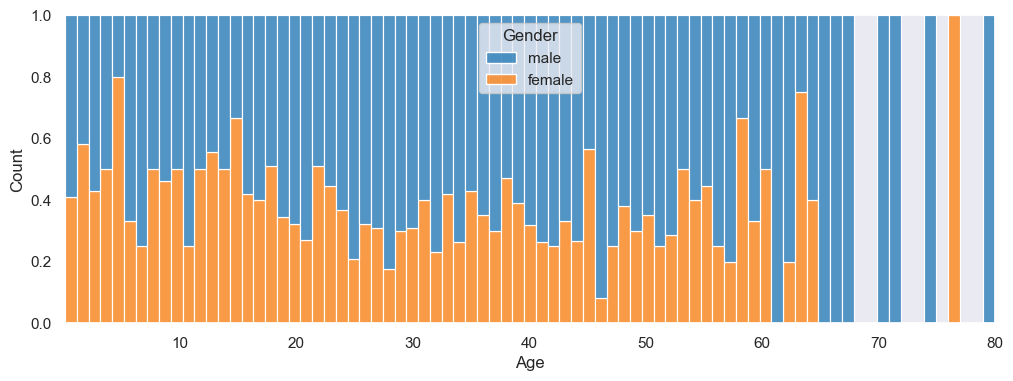

In [127]:
# Method 2 - seaborn
sns.histplot(x=titanic.Age,
             hue = titanic.Gender,
             bins=79,
             multiple='fill'
            )

plt.savefig('../figures/gender_sns.png');

#### Use the right plot to visualize the column `Pclass`.

''

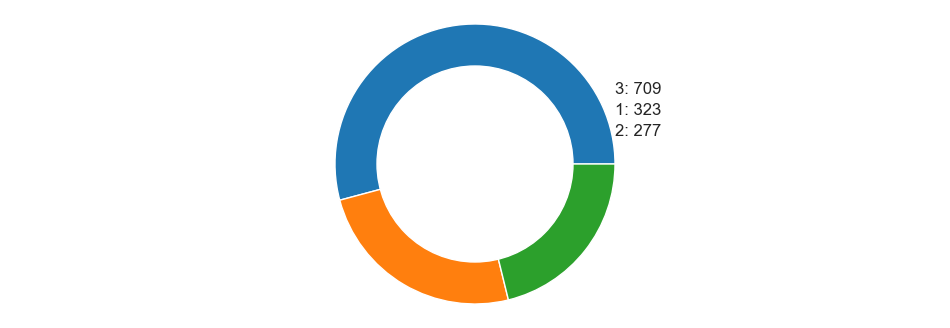

In [142]:
plt.pie(titanic.Pclass.value_counts())



my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

data = titanic.Pclass.value_counts()
for i, count in enumerate(data):
    plt.annotate(f'{data.index[i]}: {count}', xy=(1, 0.5 - i*0.15), fontsize=12)
    
plt.axis('equal')
; 

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here